# Tensorflow Basics

In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [3]:
a = tf.constant(2.0)
b = tf.constant(3.0)
c = tf.constant(5.0)

add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

print(add)
print(sub)
print(mul)
print(div)

mymean = tf.reduce_mean([a,b,c])
mysum = tf.reduce_sum([a, b, c])

print(f'mean = {mymean.numpy()}')

tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(0.6666667, shape=(), dtype=float32)
mean = 3.3333332538604736


In [9]:
A = tf.constant([[3, 7],
                [1, 9]])
# V is a column vector
V = tf.constant([[5],
                 [2]])
AT = tf.transpose(A)

Av = tf.matmul(A, V)

print(f' Transpose: {AT.numpy()}')
print(f' Mul: {Av.numpy()}') # 2x2 is multiplied by 2x1 ->> 2x1 result

 Transpose: [[3 1]
 [7 9]]
 Mul: [[29]
 [23]]


In [12]:
# Elementwise multiplication

Av2 = tf.multiply(A, V)
'''
Here the first elemet of 5 is multiplied with the first row and same for the second element of V
'''
print(f'Element-wise \n {Av2.numpy()}')

Element-wise 
 [[15 35]
 [ 2 18]]


In [13]:
# Find determinant of the matrix
A = tf.constant([[3, 7],
                [1, 9]])
# Typecasting 
A = tf.cast(A, tf.float32)
# 3x9 - 1x7
det_A = tf.linalg.det(A)

print(f'Detereminant is \n {det_A.numpy()}')

Detereminant is 
 20.0


In [15]:
# Dot product

A = tf.constant([[23,34, 5],
                 [8,23,55],
                 [23,24,45]])


B = tf.constant([[24,32, 5],
                 [8,33,55],
                 [23,4,45]])

dot_AB = tf.tensordot(A, B, axes=1)
# Try axe = 0 H.W.
print(f' Dot product is {dot_AB.numpy()}')

 Dot product is [[ 939 1878 2210]
 [1641 1235 3780]
 [1779 1708 3460]]


In [16]:
'''
GRADIENT TAPE
Gradient means a derivative
tensorflow is desin=gned for DL and ML. Gradient can be used to minimize the error or maximize the accuracy i.e optimization of algorithm. 
GT will automatically will do the differentiation.
Let us first understand how Gradient is calculated
GD is an iterative optimization procedure
'''
x = tf.constant(4.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**3

#Subfunction of tf.GradientTape. Grad will be dy/dx
grad = tape.gradient(y, x)
#dy/dx = x^3 >> subs x with 4 so 3x4^2
#This does automatic differentiation
print(f' Gradient of y wrt x at x = {x} is {grad.numpy()}')

 Gradient of y wrt x at x = 4.0 is 48.0


In [19]:
x = tf.Variable(4.0, trainable = True)

with tf.GradientTape() as tape:
  #tape.watch(x)  Only if you are using for constant
  y = x**3
grad = tape.gradient(y, x)
print(f' Gradient of y wrt x at x = {x} is {grad.numpy()}')

 Gradient of y wrt x at x = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0> is 48.0


In [20]:
# Higher order derivatives

x = tf.Variable(4.0, trainable = True)

with tf.GradientTape() as tape:
  with tf.GradientTape() as tape1:
    y = x**3
  order1 = tape1.gradient(y, x)
order2 = tape.gradient(order1, x)
print(f'2nd order gradient of y wrt x at {x.numpy()} is {order2.numpy()}')

2nd order gradient of y wrt x at 4.0 is 24.0


In [21]:
# Persistent: store the information internally

a = tf.Variable(5.0, trainable = True)
b = tf.Variable(4.0, trainable = True)
'''
When we initialise the persistent the tape.gradient can be called as many times as required. If its False, you cannot reuse the tape.gradient and the after
calling the tape it gets released from the memory
'''
with tf.GradientTape(persistent = True) as tape:
  #tape.watch(x)  Only if you are using for constant
  y1 = a**2
  y2 = b**3

ga = tape.gradient(y1, a)
gb = tape.gradient(y2, b)

print(f'Gradient y1 wrt a at a = {a.numpy()} is {ga.numpy()}')

print(f'Gradient y1 wrt a at a = {b.numpy()} is {gb.numpy()}')

Gradient y1 wrt a at a = 5.0 is 10.0
Gradient y1 wrt a at a = 4.0 is 48.0


# Keras 
### Fashion Mnist classification

In [23]:
#KERAS
'''
Higher level library that was build on top of tensorflow which it self is built on top of numpy, pandas
'''
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle boot']

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
#Type casting to floating point tensor
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
# Creating the Vanila neural network
# 784 --- 256 -- 10
'''
Flatten : convert 28x28 matrix into a vector
Dense : The layer is if fully connected i.e. 784 neurons connected to all 256 neurons 
'''
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(256, activation= 'relu'),
                          keras.layers.Dense(10)
])

In [0]:
'''
Cross Entropy is the diff between 2 probability distributions
'''
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [31]:
#training

model.fit(train_images, train_labels, epochs=90)

Epoch 1/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4157 - accuracy: 0.8572
Epoch 2/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4216 - accuracy: 0.8571
Epoch 3/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4294 - accuracy: 0.8554
Epoch 4/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4220 - accuracy: 0.8576
Epoch 5/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4100 - accuracy: 0.8580
Epoch 6/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4146 - accuracy: 0.8591
Epoch 7/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4082 - accuracy: 0.8603
Epoch 8/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4313 - accuracy: 0.8577
Epoch 9/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4135 - accuracy: 0.8602
Epoch 10/90
1875/1875 [==============================] - 4s 2ms/step - loss: 0.406

In [36]:
#Evaluate the  model: What happens on  the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.8955 - accuracy: 0.8413
0.8413000106811523


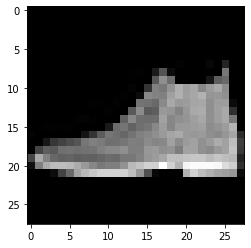

Model pred = Ankle boot, Orignal label = Ankle boot


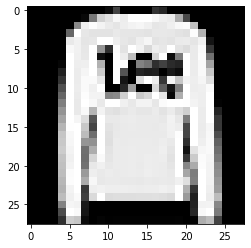

Model pred = Pullover, Orignal label = Pullover


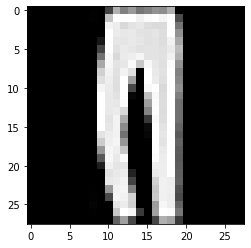

Model pred = Trouser, Orignal label = Trouser


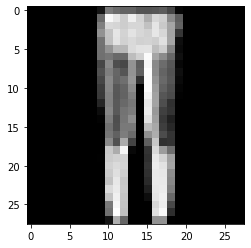

Model pred = Trouser, Orignal label = Trouser


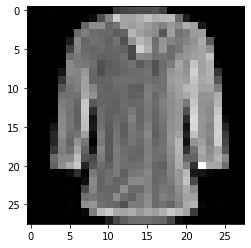

Model pred = Shirt, Orignal label = Shirt


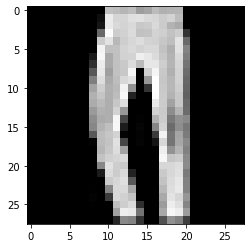

Model pred = Trouser, Orignal label = Trouser


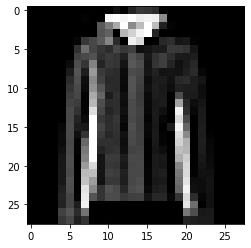

Model pred = Coat, Orignal label = Coat


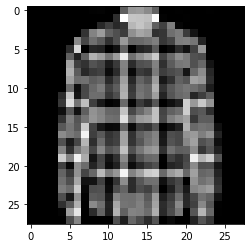

Model pred = Shirt, Orignal label = Shirt


In [41]:
import matplotlib.pyplot as plt
import numpy as np

n_images = 8
test_imgs = test_images[:n_images]
test_labs = test_labels[:n_images]
preds = model.predict(test_imgs)
for i in range(n_images):
  plt.imshow(np.reshape(test_imgs[i], [28,28]), cmap = 'gray')
  plt.show()
  print(f'Model pred = {class_names[np.argmax(preds[i])]}, Orignal label = {class_names[test_labs[i]]}')